In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [66]:
df = pd.read_csv('587project_data.csv')
test_x = [1000, 5000, 10000, 50000, 100000, 500000, 1000000]
test_size = len(test_x)
df['CPU_Time'] = df['CPU_Time'].apply(lambda x: x/1000000)
df['GPU_Time'] = df['GPU_Time'].apply(lambda x: x/1000)
df['GPU_nsrd_Time'] = df['GPU_nsrd_Time'].apply(lambda x: x/1000)
pass

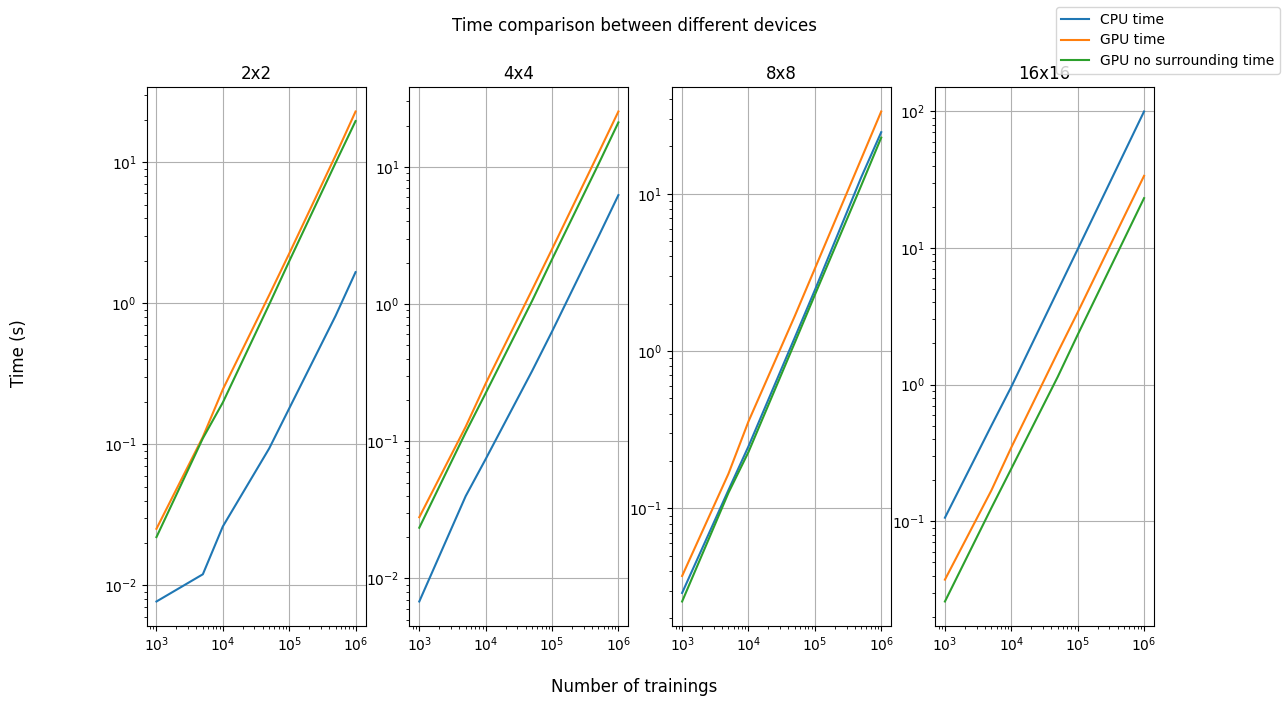

In [74]:
# CPU time, GPU time, GPU srd comparison

fig, ax = plt.subplots(1, 4, figsize=(13, 7))
fig.suptitle('Time comparison between different devices')
for i in range(4):
    start = i * test_size
    end = start + test_size
    ax[i].plot(test_x, df['CPU_Time'][start : end], label='CPU time')
    ax[i].plot(test_x, df['GPU_Time'][start : end], label='GPU time')
    ax[i].plot(test_x, df['GPU_nsrd_Time'][start : end], label='GPU no surrounding time')
    ax[i].set_title(str(2**(i+1)) + 'x' + str(2**(i+1)))
    #ax[i].set_ylim(-0.1, 100)
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')
    ax[i].grid()
fig.supxlabel('Number of trainings')
fig.supylabel('Time (s)')
handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels)

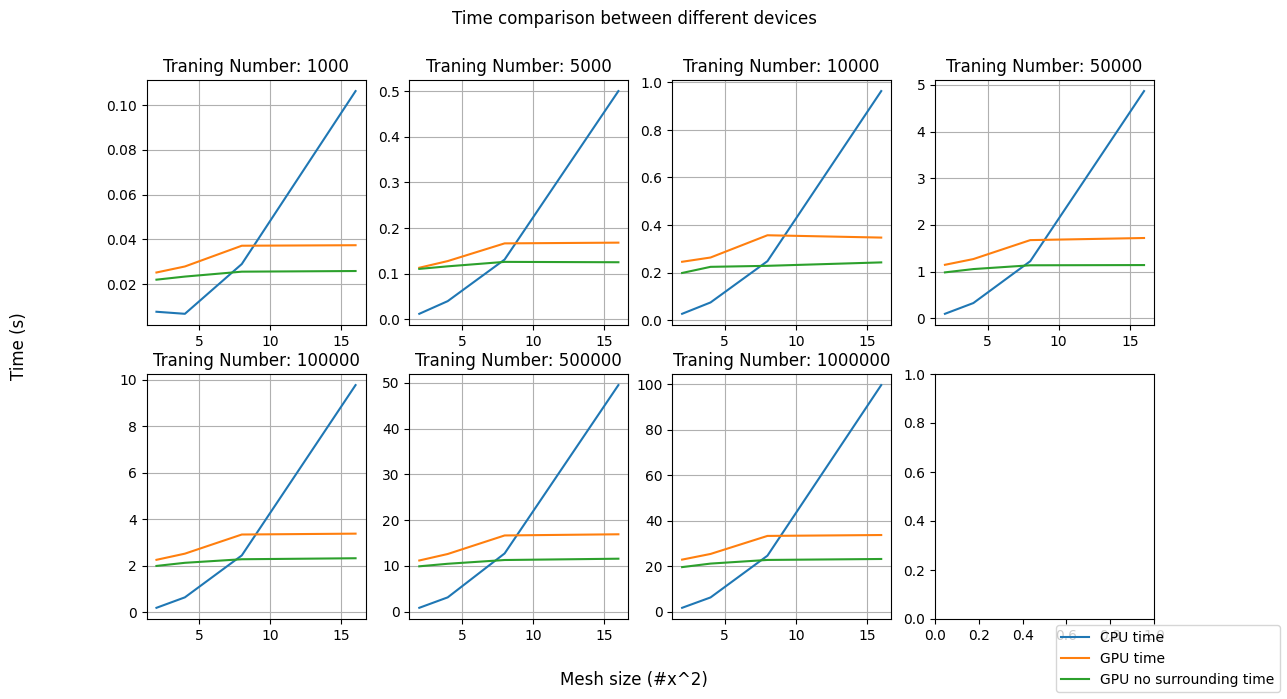

In [79]:
plt.close()
fig, ax = plt.subplots(2, 4, figsize=(13, 7))
fig.suptitle('Time comparison between different devices')

for i in range(test_size):
    cpu_time = [df['CPU_Time'][i + x * test_size] for x in range(4)]
    gpu_time = [df['GPU_Time'][i + x * test_size] for x in range(4)]
    gpu_nsrd_time = [df['GPU_nsrd_Time'][i + x * test_size] for x in range(4)]
    y = int(i / 4)
    x = i % 4
    ax[y, x].plot([2, 4, 8, 16], cpu_time, label='CPU time')
    ax[y, x].plot([2, 4, 8, 16], gpu_time, label='GPU time')
    ax[y, x].plot([2, 4, 8, 16], gpu_nsrd_time, label='GPU no surrounding time')

    ax[y, x].set_title(str("Traning Number: " + str(test_x[i])))
    #ax[y, x].set_ylim(-0.1, 100)
    ax[y, x].grid()
fig.supxlabel('Mesh size (#x^2)')
fig.supylabel('Time (s)')
labels = ['CPU time', 'GPU time', 'GPU no surrounding time']

lines = []
for ax in fig.axes:
    Line, Label = ax.get_legend_handles_labels()
    # print(Label)
    lines.extend(Line)
    #labels.extend(Label)

fig.legend(lines, labels, loc='lower right')

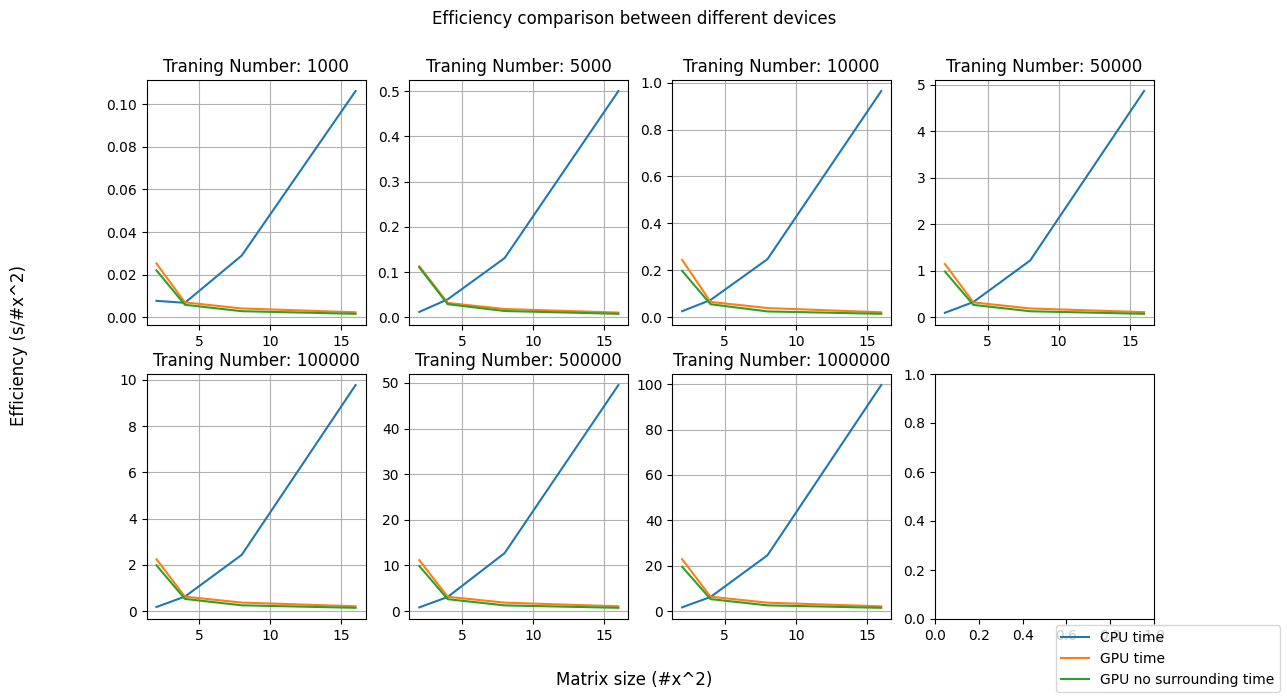

In [78]:
plt.close()
fig, ax = plt.subplots(2, 4, figsize=(13, 7))
fig.suptitle('Efficiency comparison between different devices')

for i in range(test_size):
    cpu_time = [df['CPU_Time'][i + x * test_size] / (x+1)**2 for x in range(4)]
    gpu_time = [df['GPU_Time'][i + x * test_size] / (x+1)**2 for x in range(4)]
    gpu_nsrd_time = [df['GPU_nsrd_Time'][i + x * test_size] / (x+1)**2 for x in range(4)]
    y = int(i / 4)
    x = i % 4
    ax[y, x].plot([2, 4, 8, 16], cpu_time, label='CPU time')
    ax[y, x].plot([2, 4, 8, 16], gpu_time, label='GPU time')
    ax[y, x].plot([2, 4, 8, 16], gpu_nsrd_time, label='GPU no surrounding time')

    ax[y, x].set_title(str("Traning Number: " + str(test_x[i])))
    #ax[y, x].set_ylim(-0.1, 100)
    ax[y, x].grid()
fig.supxlabel('Mesh size (#x^2)')
fig.supylabel('Efficiency (s/#x^2)')
labels = ['CPU time', 'GPU time', 'GPU no surrounding time']

lines = []
for ax in fig.axes:
    Line, Label = ax.get_legend_handles_labels()
    # print(Label)
    lines.extend(Line)
    #labels.extend(Label)

fig.legend(lines, labels, loc='lower right')

In [75]:
plt.close()
cpu_time_same_size = []
for x in range(test_size):
    cpu_time_same_size.append([df['CPU_Time'][i * test_size + x] for i in range(4)])
print(cpu_time_same_size)

[0.03742475, 0.1706125, 0.32794724999999997, 1.6267415]


In [ ]:


plt.plot(test_x, df['CPU_Time'][0 : test_size], label='CPU time')



fig, ax = plt.subplots(2, 4, figsize=(13, 7))
fig.suptitle('Efficiency comparison between different devices')

for i in range(test_size):
    cpu_time = [df['CPU_Time'][i + x * test_size] for x in range(4)]
    gpu_time = [df['GPU_Time'][i + x * test_size] for x in range(4)]
    gpu_nsrd_time = [df['GPU_nsrd_Time'][i + x * test_size] for x in range(4)]
    y = int(i / 4)
    x = i % 4
    ax[y, x].plot([2, 4, 8, 16], cpu_time, label='CPU time')
    ax[y, x].plot([2, 4, 8, 16], gpu_time, label='GPU time')
    ax[y, x].plot([2, 4, 8, 16], gpu_nsrd_time, label='GPU no surrounding time')

    ax[y, x].set_title(str("Traning Number: " + str(test_x[i])))
    #ax[y, x].set_ylim(-0.1, 100)
    ax[y, x].grid()
fig.supxlabel('Matrix size')
fig.supylabel('Time (s)')
labels = ['CPU time', 'GPU time', 'GPU no surrounding time']

lines = []
for ax in fig.axes:
    Line, Label = ax.get_legend_handles_labels()
    # print(Label)
    lines.extend(Line)
    #labels.extend(Label)

fig.legend(lines, labels, loc='lower right')